In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
import matplotlib.image as mpimg  # To view color image 
%matplotlib inline

In [ ]:
# Base directroy where dataset is stored locally 
base_dir = '/content/drive/MyDrive/fire_dataset'

# Collecting all folders containing fire and non-fire images 
src_fire = glob.glob(base_dir + '/fire_images')
src_nofire = glob.glob(base_dir + '/non_fire_images')

# Directories to store combined fire dataset and non-fire dataset 
dst_fire = os.path.join(base_dir, 'Fire_images')
dst_nofire = os.path.join(base_dir, 'Non_fire_images')

# Makeing directories if they are not there already. 
if not os.path.exists(dst_fire):
    os.makedirs(dst_fire)

if not os.path.exists(dst_nofire):
    os.makedirs(dst_nofire)

In [ ]:
import shutil
def copy_file(src_path, dst_path, shuffle=False, no_modify=True, \
              start_index=None, end_index=None):
    
    '''This function copies files from src_path to dst_path.
    It copies files from start_index to end_index.
    shuffling can be activated to copy random files
    rather than first in the list.
    If modify=True, This function converts images to 
    RGB format and .jpg type before copying if they 
    are not already.'''
    
    # All files in src_path
    src_files = os.listdir(src_path)
    
    # Shuffle files before copying 
    if shuffle==True:
        for _ in range(10):
            random.shuffle(src_files)
    
    # Prepare directory to copy files 
    os.chdir(dst_path)
    
    # Copy from source to destination    
        
    for fname in src_files[start_index : end_index]:
        src = os.path.join(src_path, fname)
        
        if no_modify:
            dst = os.path.join(dst_path, fname)
            shutil.copyfile(src, dst)
  
        # option to change file format and extension etc.
        else:
            img = Image.open(src)  
            
            # Convert all images in RGB mode 
            if img.mode != 'RGB':
                # PIL cannot convert P to RGB directly. 
                if img.mode == 'P':    
                    img = img.convert('RGBA').convert('RGB')
                else: 
                    img = img.convert('RGB')

            # Convert all images in .jpg format 
            if fname.endswith('.jpg'):
                dst = os.path.join(dst_path, fname)
                shutil.copyfile(src, dst)
            else:
                fn, fext = os.path.splitext(fname)
                img.save('{}.jpg'.format(fn))

In [ ]:
# Copying all fire images in final fire directory
for folder in src_fire:
    copy_file(folder, dst_fire, no_modify=False)

# copying all non_fire images in final non-fire directory
for folder in src_nofire:
  copy_file(folder, dst_nofire, no_modify=False)


In [ ]:
import random
def file_rename(path, name, n_shuffle=10):
    
    '''This functions renames all the .jpg 
    files in path in name.#.jpg format. 
    name should be passed as string. 
    Files are shuffled before renaming. 
    n_shuffle is number of times you shuffle
    the files.'''
    
    files = os.listdir(path)
    
    for _ in range(n_shuffle):
        random.shuffle(files)
    
    for index, file in enumerate(files):
        src = os.path.join(path, file)
        dst = os.path.join(path, \
                ''.join([name,'.', str(index + 1), '.jpg']))
        os.rename(src, dst)

In [ ]:
# Renaming files 
file_rename(dst_fire, 'fire', n_shuffle=100)
file_rename(dst_nofire, 'nofire', n_shuffle=100)

In [ ]:
# make train directories 
train_dir = os.path.join(base_dir, 'train')

train_dir_fire = os.path.join(train_dir, 'fire')
if not os.path.exists(train_dir_fire):
    os.makedirs(train_dir_fire)
    
train_dir_nofire = os.path.join(train_dir, 'nofire')
if not os.path.exists(train_dir_nofire):
    os.makedirs(train_dir_nofire)

# make test directories 
test_dir = os.path.join(base_dir, 'test')

test_dir_fire = os.path.join(test_dir, 'fire')
if not os.path.exists(test_dir_fire):
    os.makedirs(test_dir_fire)
    
test_dir_nofire = os.path.join(test_dir, 'nofire')
if not os.path.exists(test_dir_nofire):
    os.makedirs(test_dir_nofire)

In [ ]:
# Three-quarter is for training and one-quarter is for testing 
n_23 = 3 * len(os.listdir(dst_fire)) // 4

# Copying train images 
copy_file(dst_fire, train_dir_fire, end_index=n_23)
copy_file(dst_nofire, train_dir_nofire, end_index=n_23)

# Copying test images 
copy_file(dst_fire, test_dir_fire, start_index=n_23)
copy_file(dst_nofire, test_dir_nofire, start_index=n_23)

In [ ]:
def image_collage(path, n_rows, n_cols, title):
    
    '''This function selects the first few images from given 
    path and presents in the collage form. 
    path is the directory from which images are taken. 
    n_rows and n_cols are rows and column of the collage. 
    title is the title of the collage.'''
    
    # Initiating the plot 
    fig = plt.figure()
    plt.title(title)
    
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        
        # showing the color images 
        img_read = mpimg.imread(img_path)

        # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        
        # displaying image in subplot 
        ax.imshow(img_read)
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

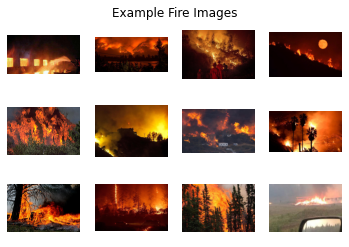

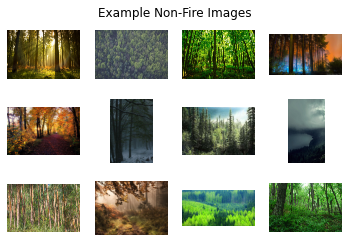

In [ ]:
image_collage(train_dir_fire, 3, 4, 'Example Fire Images')
image_collage(train_dir_nofire, 3, 4, 'Example Non-Fire Images')
